In [3]:
%pylab inline
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from matplotlib.patches import Polygon
import cmocean.cm as cmo
import gsw

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [4]:
savefig = True
figext = '.pdf'
datadir = '/Users/erik/Desktop/'

degsym = u'\u00B0'

def savefig(fignum, figext=figext, savefig=savefig):
    figname = 'Figures/Fig%s%s' % (fignum, figext)
    if savefig:
        plt.savefig(figname)

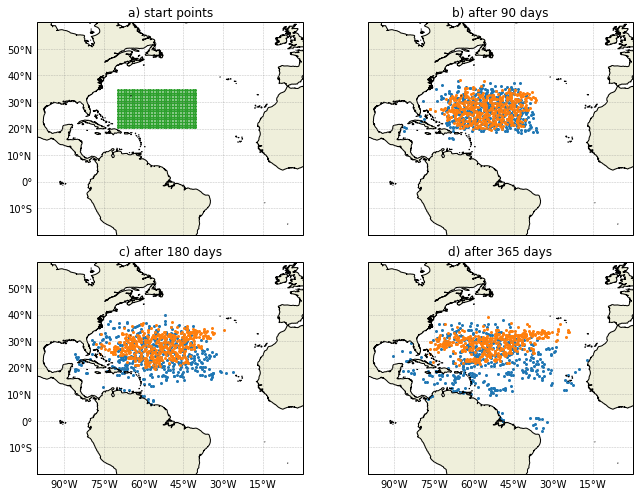

In [3]:
fignum = '03_15'

data = pd.read_csv(datadir+'ArianeData/fig03pt15.asc', header=None, delim_whitespace=True).to_numpy()

projection = cartopy.crs.PlateCarree(central_longitude=-50)
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
gs = gridspec.GridSpec(2, 2)

titles= ['a) start points', 'b) after 90 days', 'c) after 180 days', 'd) after 365 days']
psize=4
for i in range(4):
    ai = fig.add_subplot(gs[i], projection=projection)
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    
    if i == 0:
        ai.scatter(data[:, 0], data[:, 1], s=psize, c='C02', transform=cartopy.crs.PlateCarree())
    else:
        s = i*4-2
        ai.scatter(data[:, s], data[:, s+1], s=psize, c='C00', transform=cartopy.crs.PlateCarree())
        ai.scatter(data[:, s+2], data[:, s+3], s=psize, c='C01', transform=cartopy.crs.PlateCarree())
    
    ai.set_extent([-100, 0, -20, 60], crs=cartopy.crs.PlateCarree())
    ai.set_title(titles[i])
    gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                      color='gray', alpha=0.5, linestyle='--')
    if i > 1:
        gl.xlabels_bottom = True
        gl.xformatter = LONGITUDE_FORMATTER
    if i%2 ==0:
        gl.ylabels_left = True
        gl.yformatter = LATITUDE_FORMATTER

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

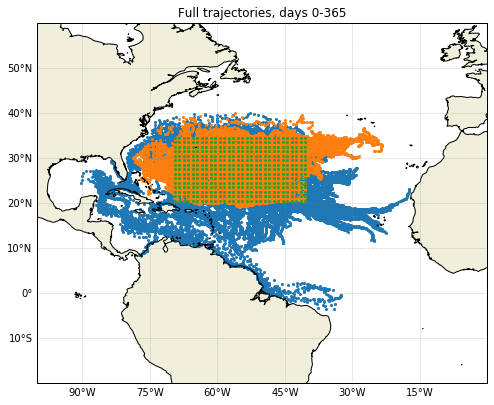

In [4]:
fignum = '03_16'

dataS = pd.read_csv(datadir+'ArianeData/fig03pt15.asc', header=None, delim_whitespace=True).to_numpy()
data = pd.read_csv(datadir+'ArianeData/fig03pt16.asc', header=None, delim_whitespace=True).to_numpy()

projection = cartopy.crs.PlateCarree(central_longitude=-50)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1], projection=projection)

psize=4
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

ax.scatter(data[:, 0], data[:, 1], s=psize, c='C00', transform=cartopy.crs.PlateCarree())
ax.scatter(data[:, 2], data[:, 3], s=psize, c='C01', transform=cartopy.crs.PlateCarree())
ax.scatter(dataS[:, 0], dataS[:, 1], s=psize, c='C02', transform=cartopy.crs.PlateCarree())
    
ax.set_extent([-100, 0, -20, 60], crs=cartopy.crs.PlateCarree())
ax.set_title('Full trajectories, days 0-365')
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                  color='gray', alpha=0.5, linestyle='--')
gl.xlabels_bottom = True
gl.xformatter = LONGITUDE_FORMATTER
gl.ylabels_left = True
gl.yformatter = LATITUDE_FORMATTER

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

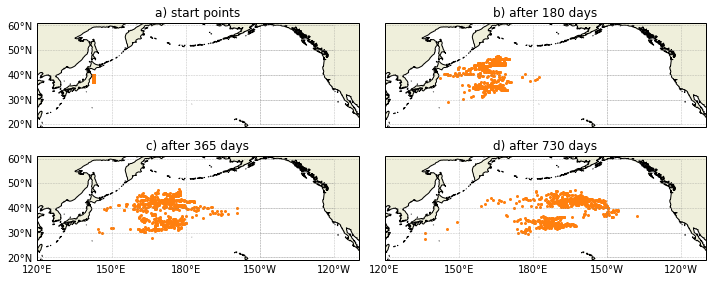

In [5]:
fignum = '03_19'

data = pd.read_csv(datadir+'ArianeData/fig03pt19.asc', header=None, delim_whitespace=True).to_numpy()

projection = cartopy.crs.PlateCarree(central_longitude=185)
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
gs = gridspec.GridSpec(2, 2)

titles= ['a) start points', 'b) after 180 days', 'c) after 365 days', 'd) after 730 days']
psize=4
for i in range(4):
    ai = fig.add_subplot(gs[i], projection=projection)
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    
    ai.scatter(data[:, i*2], data[:, i*2+1], s=psize, c='C01', transform=cartopy.crs.PlateCarree())
    
    ai.set_extent([120, 250, 19, 61], crs=cartopy.crs.PlateCarree())
    ai.set_title(titles[i])
    gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                      color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-150, -120, 120, 150, 180, 210, 240])
    gl.ylocator = mticker.FixedLocator([20, 30, 40, 50, 60])
    if i > 1:
        gl.xlabels_bottom = True
        gl.xformatter = LONGITUDE_FORMATTER
    if i%2 ==0:
        gl.ylabels_left = True
        gl.yformatter = LATITUDE_FORMATTER

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

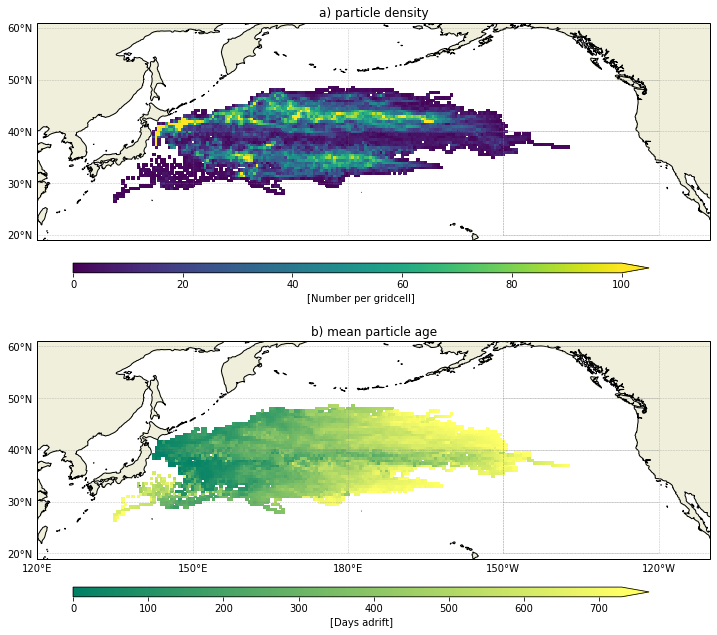

In [6]:
fignum = '03_20'

data = pd.read_csv(datadir+'ArianeData/fig03pt20.asc', header=None, delim_whitespace=True).to_numpy()
X = np.reshape(data[:,0], [260, 80])
Y = np.reshape(data[:,1], [260, 80])

projection = cartopy.crs.PlateCarree(central_longitude=185)
fig = plt.figure(figsize=(10, 9), constrained_layout=True)
gs = gridspec.GridSpec(4, 1, height_ratios=[5, 1, 5, 1])

titles = ['a) particle density', 'b) mean particle age']
labels = ['[Number per gridcell]', '[Days adrift]']
cmap = [cm.viridis, cm.summer]
vmax = [100, 730]
psize=4
for i in range(2):
    ai = fig.add_subplot(gs[i*2], projection=projection)
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    
    a = ai.pcolormesh(X, Y, np.reshape(data[:, i+2], [260, 80]), transform=cartopy.crs.PlateCarree(), 
                      vmin=0, vmax=vmax[i], rasterized=True, cmap=cmap[i])
    
    ai.set_extent([120, 250, 19, 61], crs=cartopy.crs.PlateCarree())
    ai.set_title(titles[i])
    gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                      color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-150, -120, 120, 150, 180, 210, 240])
    gl.ylocator = mticker.FixedLocator([20, 30, 40, 50, 60])
    if i > 0:
        gl.xlabels_bottom = True
        gl.xformatter = LONGITUDE_FORMATTER
    gl.ylabels_left = True
    gl.yformatter = LATITUDE_FORMATTER

    cbaxes = fig.add_axes([0.1, 0.57-(i*0.5), 0.8, 0.015])
    plt.colorbar(a, cax=cbaxes, orientation="horizontal", aspect=50, extend='max', label=labels[i])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

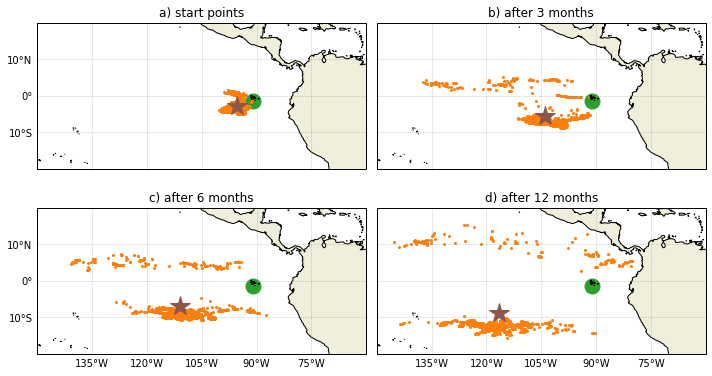

In [7]:
fignum = '06_10'

data = pd.read_csv(datadir+'ArianeData/fig06_10.asc', header=None, delim_whitespace=True).to_numpy()
datam = pd.read_csv(datadir+'ArianeData/fig06_10_extras.asc', header=None, delim_whitespace=True).to_numpy()

projection = cartopy.crs.PlateCarree(central_longitude=-110)
fig = plt.figure(figsize=(10, 5.5), constrained_layout=True)
gs = gridspec.GridSpec(2, 2)

titles= ['a) start points', 'b) after 3 months', 'c) after 6 months', 'd) after 12 months']
psize=4
for i in range(4):
    ai = fig.add_subplot(gs[i], projection=projection)
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    
    ai.scatter(data[:, i*2], data[:, i*2+1], s=psize, c='C01', transform=cartopy.crs.PlateCarree())
    ai.plot(datam[0, 0], datam[0, 1], 'o', markersize=15, color='C02', transform=cartopy.crs.PlateCarree(), zorder=-1)
    ai.plot(datam[i+1, 0], datam[i+1, 1], '*', markersize=20, color='C05', transform=cartopy.crs.PlateCarree())
    
    ai.set_extent([-150, -60, -20, 20], crs=cartopy.crs.PlateCarree())
    ai.set_title(titles[i])
    gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                      color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-150, 60, 15))
    gl.ylocator = mticker.FixedLocator(np.arange(-20, 30, 10))
    if i > 1:
        gl.xlabels_bottom = True
        gl.xformatter = LONGITUDE_FORMATTER
    if i%2 ==0:
        gl.ylabels_left = True
        gl.yformatter = LATITUDE_FORMATTER

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

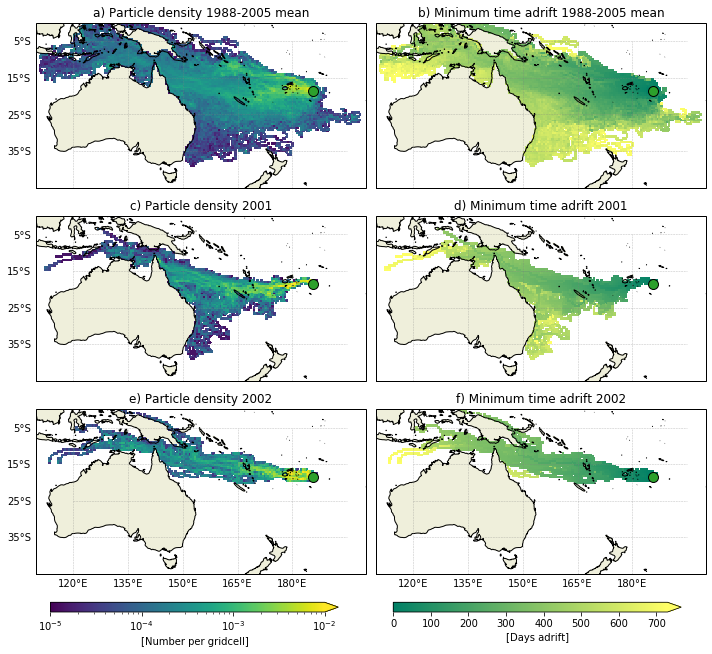

In [8]:
fignum = '06_17'

projection = cartopy.crs.PlateCarree(central_longitude=160)
fig = plt.figure(figsize=(10, 9), constrained_layout=True)
gs = gridspec.GridSpec(4, 2, height_ratios=[5, 5, 5, 1])

titles = ['Particle density', 'Minimum time adrift']
labels = ['[Number per gridcell]', '[Days adrift]']
yearlabel = ['1988-2005 mean', '2001', '2002']
subfiles = ['ab', 'cd', 'ef']
for row in range(3):
    data = pd.read_csv(datadir+'ArianeData/fig06_17%s.asc' % subfiles[row], header=None, delim_whitespace=True).to_numpy()
    X = np.reshape(data[:,0], [180, 120])
    Y = np.reshape(data[:,1], [180, 120])
    for col in range(2):
        ai = fig.add_subplot(gs[row, col], projection=projection)
        ai.coastlines(resolution='50m')
        ai.add_feature(cartopy.feature.LAND)

        if col == 0:
            d = np.reshape(data[:, 2], [180, 120])
            a = ai.pcolormesh(X, Y, pow(10, d), norm=colors.LogNorm(vmin=1e-5, vmax=1e-2), 
                              transform=cartopy.crs.PlateCarree(), rasterized=True)
        if col == 1:
            a = ai.pcolormesh(X, Y, np.reshape(data[:, 3], [180, 120]), vmin=0, vmax=730, 
                              transform=cartopy.crs.PlateCarree(), rasterized=True, cmap=cm.summer)
        ai.plot(185.5, -18.5, 'o', color='C02', markeredgecolor='k',
                transform=cartopy.crs.PlateCarree(), markersize=10)
        ai.set_extent([110, 200, -45, 0], crs=cartopy.crs.PlateCarree())
        ai.set_title('%s) %s %s' % (chr(ord('a') + col+row*2), titles[col], yearlabel[row]))
        gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                          color='gray', alpha=0.5, linestyle='--')
        gl.xlocator = mticker.FixedLocator(np.arange(120, 200, 15))
        gl.ylocator = mticker.FixedLocator(np.arange(-45, 0, 10))
        if row == 2:
            gl.xlabels_bottom = True
            gl.xformatter = LONGITUDE_FORMATTER
        if col == 0:
            gl.ylabels_left = True
            gl.yformatter = LATITUDE_FORMATTER

        if row == 2:
            cbaxes = fig.add_axes([0.075+col/2.1, 0.05, 0.4, 0.015])
            plt.colorbar(a, cax=cbaxes, orientation="horizontal", aspect=50, extend='max', label=labels[col])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

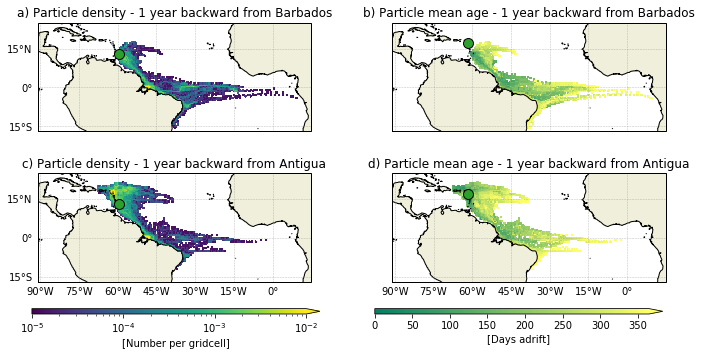

In [9]:
fignum = '06_21'

projection = cartopy.crs.PlateCarree(central_longitude=-40)
fig = plt.figure(figsize=(10, 5), constrained_layout=True)
gs = gridspec.GridSpec(3, 2, height_ratios=[5, 5, 1])

    
titles = ['Particle density', 'Particle mean age']
labels = ['[Number per gridcell]', '[Days adrift]']
loclabels = ['Barbados', 'Antigua']
startlocs = [(-59.5, 13), (-61.5, 17)]
subfiles = ['ac', 'bd']
for row in range(2):
    data = pd.read_csv(datadir+'ArianeData/fig06_21%s.asc' % subfiles[row], header=None, delim_whitespace=True).to_numpy()
    X = np.reshape(data[:,0], [240, 100])
    Y = np.reshape(data[:,1], [240, 100])
    for col in range(2):
        ai = fig.add_subplot(gs[row, col], projection=projection)
        ai.coastlines(resolution='50m')
        ai.add_feature(cartopy.feature.LAND)

        if col == 0:
            d = pow(10, np.reshape(data[:, col+2], [240, 100]))
            a = ai.pcolormesh(X, Y, d, transform=cartopy.crs.PlateCarree(), norm=colors.LogNorm(vmin=1e-5, vmax=1e-2), 
                              rasterized=True)
        else:
            a = ai.pcolormesh(X, Y, np.reshape(data[:, col+2], [240, 100]), transform=cartopy.crs.PlateCarree(), 
                              vmin=0, vmax=365, rasterized=True, cmap=cm.summer)
        ai.plot(startlocs[col][0], startlocs[col][1], 'o', color='C02', markeredgecolor='k',
                transform=cartopy.crs.PlateCarree(), markersize=10)
        ai.set_extent([-91, 15, -17, 25], crs=cartopy.crs.PlateCarree())
        ai.set_title('%s) %s - 1 year backward from %s' % (chr(ord('a') + col+row*2), titles[col], loclabels[row]))
        gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                          color='gray', alpha=0.5, linestyle='--')
        gl.xlocator = mticker.FixedLocator(np.arange(-105, 30, 15))
        gl.ylocator = mticker.FixedLocator(np.arange(-45, 45, 15))
        if row == 1:
            gl.xlabels_bottom = True
            gl.xformatter = LONGITUDE_FORMATTER
        if col == 0:
            gl.ylabels_left = True
            gl.yformatter = LATITUDE_FORMATTER

        if row == 1:
            cbaxes = fig.add_axes([0.05+col/2.1, 0.1, 0.4, 0.015])
            plt.colorbar(a, cax=cbaxes, orientation="horizontal", aspect=50, extend='max', label=labels[col])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

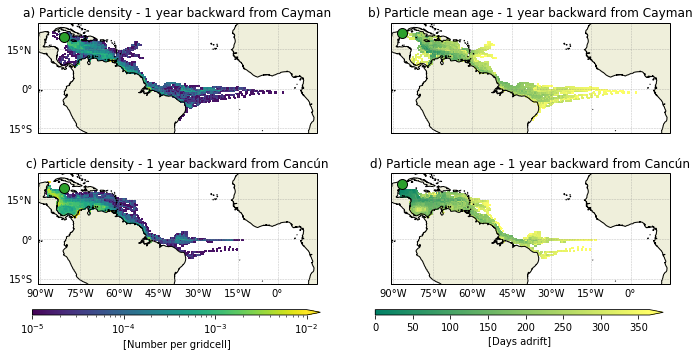

In [10]:
fignum = '06_22'

projection = cartopy.crs.PlateCarree(central_longitude=-40)
fig = plt.figure(figsize=(10, 5), constrained_layout=True)
gs = gridspec.GridSpec(3, 2, height_ratios=[5, 5, 1])

titles = ['Particle density', 'Particle mean age']
labels = ['[Number per gridcell]', '[Days adrift]']
loclabels = ['Cayman', 'Cancún']
startlocs = [(-81, 19.5), (-86.5, 21)]
subfiles = ['ac', 'bd']
for row in range(2):
    data = pd.read_csv(datadir+'ArianeData/fig06_22%s.asc' % subfiles[row], header=None, delim_whitespace=True).to_numpy()
    X = np.reshape(data[:,0], [240, 100])
    Y = np.reshape(data[:,1], [240, 100])
    for col in range(2):
        ai = fig.add_subplot(gs[row, col], projection=projection)
        ai.coastlines(resolution='50m')
        ai.add_feature(cartopy.feature.LAND)

        if col == 0:
            d = pow(10, np.reshape(data[:, col+2], [240, 100]))
            a = ai.pcolormesh(X, Y, d, transform=cartopy.crs.PlateCarree(), norm=colors.LogNorm(vmin=1e-5, vmax=1e-2), 
                              rasterized=True)
        else:
            a = ai.pcolormesh(X, Y, np.reshape(data[:, col+2], [240, 100]), transform=cartopy.crs.PlateCarree(), 
                              vmin=0, vmax=365, rasterized=True, cmap=cm.summer)
        ai.plot(startlocs[col][0], startlocs[col][1], 'o', color='C02', markeredgecolor='k',
                transform=cartopy.crs.PlateCarree(), markersize=10)
        ai.set_extent([-91, 15, -17, 25], crs=cartopy.crs.PlateCarree())
        ai.set_title('%s) %s - 1 year backward from %s' % (chr(ord('a') + col+row*2), titles[col], loclabels[row]))
        gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                          color='gray', alpha=0.5, linestyle='--')
        gl.xlocator = mticker.FixedLocator(np.arange(-105, 30, 15))
        gl.ylocator = mticker.FixedLocator(np.arange(-45, 45, 15))
        if row == 1:
            gl.xlabels_bottom = True
            gl.xformatter = LONGITUDE_FORMATTER
        if col == 0:
            gl.ylabels_left = True
            gl.yformatter = LATITUDE_FORMATTER

        if row == 1:
            cbaxes = fig.add_axes([0.05+col/2.1, 0.1, 0.4, 0.015])
            plt.colorbar(a, cax=cbaxes, orientation="horizontal", aspect=50, extend='max', label=labels[col])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

<Figure size 720x576 with 0 Axes>

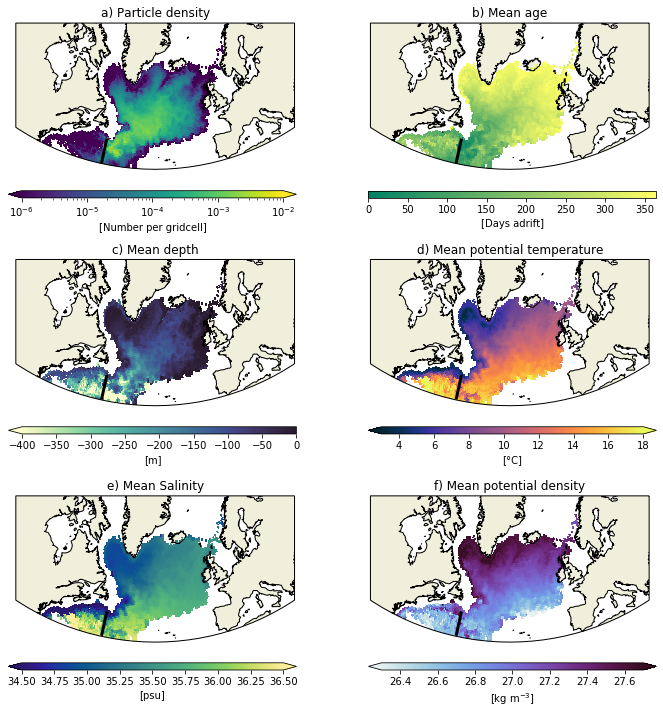

In [15]:
fignum = '07_24'

projection = cartopy.crs.LambertConformal(cutoff=36, central_longitude=-32.5)
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = gridspec.GridSpec(6, 2, height_ratios=[4, 1, 4, 1, 4, 1])

data = pd.read_csv(datadir+'ArianeData/fig07_24.asc', header=None, delim_whitespace=True).to_numpy()
X = np.reshape(data[:,0], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
Y = np.reshape(data[:,1], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])

titles = ['a) Particle density', 'b) Mean age', 'c) Mean depth', 
          'd) Mean potential temperature', 'e) Mean Salinity', 'f) Mean potential density']
labels = ['[Number per gridcell]', '[Days adrift]', '[m]', '[%sC]' % degsym, '[psu]', '[kg m$^{-3}$]']
cmaps = [cm.viridis, cm.summer, cmo.deep, cmo.thermal, cmo.haline, cmo.dense]
extend = ['both', 'neither', 'min', 'both', 'both', 'both']
vmin = [1e-6, 0, -400, 3, 34.5, 26.3]
vmax = [1e-2, 365, 0, 18, 36.5, 27.7]
for row in range(3):
    for col in range(2):
        ai = fig.add_subplot(gs[row*2, col], projection=projection)
        ai.coastlines(resolution='50m')
        ai.add_feature(cartopy.feature.LAND)
        i = col + row*2
        ai.set_title(titles[i])
        if i == 0:
            d = np.reshape(data[:, 2]/1e4, [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
            a = ai.pcolormesh(X, Y, d, transform=cartopy.crs.PlateCarree(), norm=colors.LogNorm(vmin=1e-6, vmax=1e-2), 
                              rasterized=True)
        elif i == 2:
            a = ai.pcolormesh(X, Y, -1*np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                              transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        else:
            a = ai.pcolormesh(X, Y, np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                  transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        ai.plot([-52]*20, np.linspace(36.6, 43, 20), 'k', linewidth=3, transform=cartopy.crs.PlateCarree())
        cbaxes = fig.add_axes([0.05+col/2, 0.72-row/3.05, 0.4, 0.01])
        plt.colorbar(a, cax=cbaxes, orientation='horizontal', aspect=100, extend=extend[i], label=labels[i])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

<Figure size 720x576 with 0 Axes>

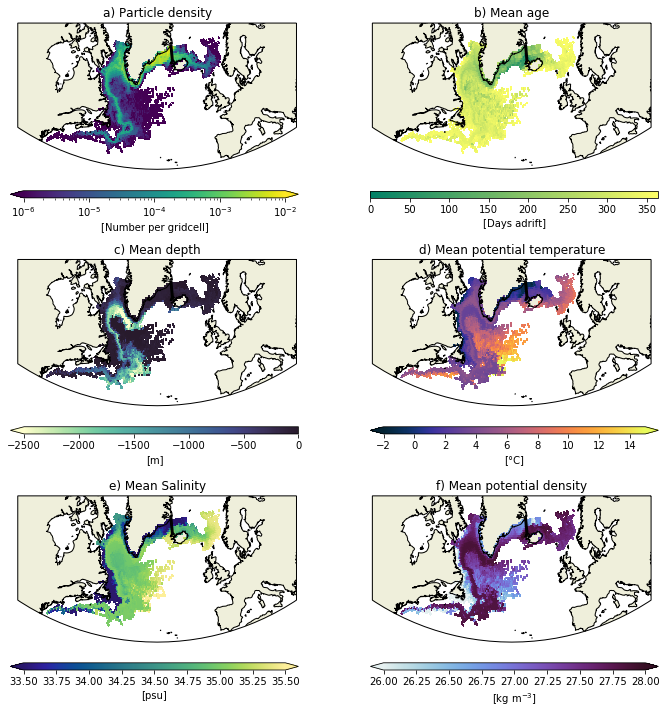

In [16]:
fignum = '07_26'

projection = cartopy.crs.LambertConformal(cutoff=36, central_longitude=-32.5)
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = gridspec.GridSpec(6, 2, height_ratios=[4, 1, 4, 1, 4, 1])

data = pd.read_csv(datadir+'ArianeData/fig07_26.asc', header=None, delim_whitespace=True).to_numpy()
X = np.reshape(data[:,0], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
Y = np.reshape(data[:,1], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])

titles = ['a) Particle density', 'b) Mean age', 'c) Mean depth', 
          'd) Mean potential temperature', 'e) Mean Salinity', 'f) Mean potential density']
labels = ['[Number per gridcell]', '[Days adrift]', '[m]', '[%sC]' % degsym, '[psu]', '[kg m$^{-3}$]']
cmaps = [cm.viridis, cm.summer, cmo.deep, cmo.thermal, cmo.haline, cmo.dense]
extend = ['both', 'neither', 'min', 'both', 'both', 'both']
vmin = [1e-6, 0, -2500, -2, 33.5, 26]
vmax = [1e-2, 365, 0, 15, 35.5, 28]
for row in range(3):
    for col in range(2):
        ai = fig.add_subplot(gs[row*2, col], projection=projection)
        ai.coastlines(resolution='50m')
        ai.add_feature(cartopy.feature.LAND)
        i = col + row*2
        ai.set_title(titles[i])
        if i == 0:
            d = np.reshape(data[:, 2]/1e4, [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
            a = ai.pcolormesh(X, Y, d, transform=cartopy.crs.PlateCarree(), norm=colors.LogNorm(vmin=1e-6, vmax=1e-2), 
                              rasterized=True)
        elif i == 2:
            a = ai.pcolormesh(X, Y, -1*np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                              transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        else:
            a = ai.pcolormesh(X, Y, np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                  transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        ai.plot(np.linspace(-22.898, -22.7552, 20), np.linspace(66.3978, 69.9554, 20), 'k', linewidth=3, transform=cartopy.crs.PlateCarree())
        cbaxes = fig.add_axes([0.05+col/2, 0.72-row/3.05, 0.4, 0.01])
        plt.colorbar(a, cax=cbaxes, orientation='horizontal', aspect=100, extend=extend[i], label=labels[i])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

<Figure size 720x576 with 0 Axes>

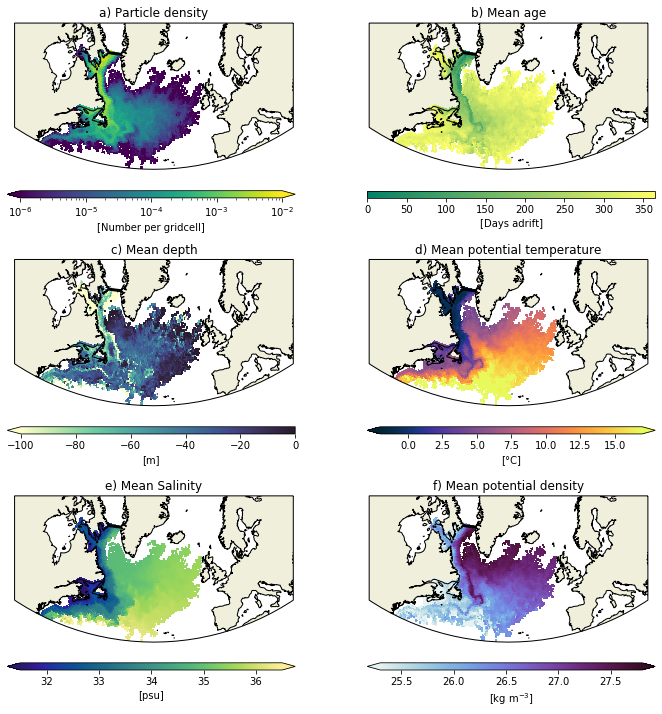

In [18]:
fignum = '07_27'

projection = cartopy.crs.LambertConformal(cutoff=36, central_longitude=-32.5)
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = gridspec.GridSpec(6, 2, height_ratios=[4, 1, 4, 1, 4, 1])

data = pd.read_csv(datadir+'ArianeData/fig07_27.asc', header=None, delim_whitespace=True).to_numpy()
X = np.reshape(data[:,0], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
Y = np.reshape(data[:,1], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])

titles = ['a) Particle density', 'b) Mean age', 'c) Mean depth', 
          'd) Mean potential temperature', 'e) Mean Salinity', 'f) Mean potential density']
labels = ['[Number per gridcell]', '[Days adrift]', '[m]', '[%sC]' % degsym, '[psu]', '[kg m$^{-3}$]']
cmaps = [cm.viridis, cm.summer, cmo.deep, cmo.thermal, cmo.haline, cmo.dense]
extend = ['both', 'neither', 'min', 'both', 'both', 'both']
vmin = [1e-6, 0, -100, -2, 31.5, 25.3]
vmax = [1e-2, 365, 0, 17, 36.5, 27.8]
for row in range(3):
    for col in range(2):
        ai = fig.add_subplot(gs[row*2, col], projection=projection)
        ai.coastlines(resolution='50m')
        ai.add_feature(cartopy.feature.LAND)
        i = col + row*2
        ai.set_title(titles[i])
        if i == 0:
            d = np.reshape(data[:, 2]/1e4, [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
            a = ai.pcolormesh(X, Y, d, transform=cartopy.crs.PlateCarree(), norm=colors.LogNorm(vmin=1e-6, vmax=1e-2), 
                              rasterized=True)
        elif i == 2:
            a = ai.pcolormesh(X, Y, -1*np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                              transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        else:
            a = ai.pcolormesh(X, Y, np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                  transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        ai.plot(np.linspace(-61, -54, 20), np.linspace(66.7, 67.1, 20), 'k', linewidth=3, transform=cartopy.crs.PlateCarree())
        cbaxes = fig.add_axes([0.05+col/2, 0.72-row/3.05, 0.4, 0.01])
        plt.colorbar(a, cax=cbaxes, orientation='horizontal', aspect=100, extend=extend[i], label=labels[i])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)

<Figure size 720x576 with 0 Axes>

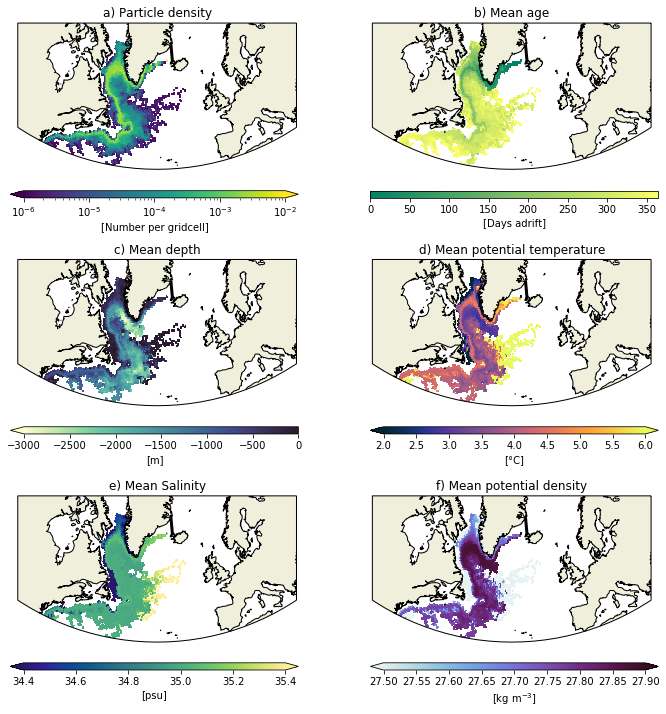

In [20]:
fignum = '07_30'

projection = cartopy.crs.LambertConformal(cutoff=36, central_longitude=-32.5)
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = gridspec.GridSpec(6, 2, height_ratios=[4, 1, 4, 1, 4, 1])

data = pd.read_csv(datadir+'ArianeData/fig07_30.asc', header=None, delim_whitespace=True).to_numpy()
X = np.reshape(data[:,0], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
Y = np.reshape(data[:,1], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])

titles = ['a) Particle density', 'b) Mean age', 'c) Mean depth', 
          'd) Mean potential temperature', 'e) Mean Salinity', 'f) Mean potential density']
labels = ['[Number per gridcell]', '[Days adrift]', '[m]', '[%sC]' % degsym, '[psu]', '[kg m$^{-3}$]']
cmaps = [cm.viridis, cm.summer, cmo.deep, cmo.thermal, cmo.haline, cmo.dense]
extend = ['both', 'neither', 'min', 'both', 'both', 'both']
vmin = [1e-6, 0, -3000, 2, 35.4, 27.5]
vmax = [1e-2, 365, 0, 6, 34.4, 27.9]
for row in range(3):
    for col in range(2):
        ai = fig.add_subplot(gs[row*2, col], projection=projection)
        ai.coastlines(resolution='50m')
        ai.add_feature(cartopy.feature.LAND)
        i = col + row*2
        ai.set_title(titles[i])
        if i == 0:
            d = np.reshape(data[:, 2]/1e4, [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))])
            a = ai.pcolormesh(X, Y, d, transform=cartopy.crs.PlateCarree(), norm=colors.LogNorm(vmin=1e-6, vmax=1e-2), 
                              rasterized=True)
        elif i == 2:
            a = ai.pcolormesh(X, Y, -1*np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                              transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        else:
            a = ai.pcolormesh(X, Y, np.reshape(data[:, i+2], [len(np.unique(data[:, 0])), len(np.unique(data[:, 1]))]), 
                  transform=cartopy.crs.PlateCarree(), vmin=vmin[i], vmax=vmax[i], rasterized=True, cmap=cmaps[i])
        ai.plot(np.linspace(-22.898, -22.7552, 20), np.linspace(66.3978, 69.9554, 20), 'k', linewidth=3, transform=cartopy.crs.PlateCarree())
        cbaxes = fig.add_axes([0.05+col/2, 0.72-row/3.05, 0.4, 0.01])
        plt.colorbar(a, cax=cbaxes, orientation='horizontal', aspect=100, extend=extend[i], label=labels[i])

fig.canvas.draw()
plt.tight_layout()
savefig(fignum)